# **Rapid Mix Hydraulic - Potential Energy**

Authors: Cynthia Chu, Dominic Grasso, Yitzy Rosenberg

Team Name: Many Power Corgi Mode

[/Monroe/]: # (Good work exploring hydraulic jump. As you gain more experience you will use the early exploration to very quickly check feasibility so you know whether or not to continue exploring that option. For the hydraulic jump the question is whether their is enough energy available to power a hydraulic jump. Your first design suggests you might have a real problem! But that is great. Check to see if you made any bad assumptions about water depths and if this is the minimum amount of energy that is needed by a hydrualic jump, then you document that including equations in Latex and then move on to a more energy efficiency design. In this case you need to use less energy and thus the maximum velocity in the constricted flow must be MUCH lower.) 

[/Monroe/]: # (When you respond to my comments make the change in the report instead of only addressing it in another comment.)

[/Monroe/]: # (Before writing code show the equations in Latex in Markdown and explain what you are solving for. Showing the equations that you are using is easy and so helpful. I've inserted one equation from the AguaClara textbook below to show how easy it is. NO need to type ANY Latex!)

[/Monroe/]: # (Comment on the results of your design calculaions. Check whether or not the design is reasonable. Reasonable is defined by constraints of the project and goals of reducing cost and resource use.)

[/Monroe/]: # (Push forward quickly on the flocculator design. Consider creating functions for the flocculator design so that you can easily create graphs showing a range of designs. For example the number of treatment trains could be a variable that you might explore.)



In [70]:
!pip install aguaclara
!pip install molmass

In [71]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-19 16:57:12--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3064 (3.0K) [text/plain]
Saving to: ‘Fairmont.py.4’

Fairmont.py.4       100%[===================>]   2.99K  --.-KB/s    in 0s      

2020-05-19 16:57:12 (22.3 MB/s) - ‘Fairmont.py.4’ saved [3064/3064]



#**Task Definition**
Our task is to determine an effective design for rapid mix and flocculation in the Fairmont Sedimentation Plant (FSP) that is powered by potential energy.  The goal of rapid mix is to mix coagulant nanoparticle- ferric chloride in this case- with influent raw water.  After rapid mix, the particles continue to aggregate during flocculation- forming floccs. This step allows for particle removal in sedimentation and/or filtration.  The designs below aim to minimize cost and plan view area and maximize performance metrics while complying with client expectations and constraints. 



# **Executive Summary**

The hydraulic rapid mix and the flocculator employ many of the same physics principles in the basis of their designs.  In each unit process, energy dissipation rates and velocity gradients from head loss are responsible for the coagulation and flocculation which lead to flocc development.  In hydraulic rapid mix, the main parameter used to gauge effectiveness is the mixing time.  Mixing time is important in a rapid mix unit because when coagulant is first added to the raw water, self-aggregation between coagulant nanoparticles can occur if the mixing time is too long.  The main parameter in the hydraulic flocculator is the velocity gradient which is achieved by the head loss as water is directed around baffles. 

The hydraulic rapid mix design our team chose was one in which round pillars are placed in an open channel (we will refer to this as obstructed open channel flow). In obstructed open channel flow, the pillars create head loss and eddies which in turn generate the energy dissipation and large-scale mixing required in rapid mix.  This report also considers the use of a hydraulic jump and an open channel with a single flow expansion (diagram below) to carry out rapid mix; however, both were discarded on account of not complying with project constraints and goals.

The hydraulic flocculation model chosen by our team is based on the Agua Clara model; however, it operates with horizontal flow as opposed to vertical flow. The horizontal flow model makes the flocculator more efficient given the scale of this project and easier for use.  Only one design was create for the hydraulic flocculator, but it generates an excel spreadsheet comparing design parameters and outputs for different numbers of treatment trains. Deciding the optimal number of treatment trains was a major question for this desing.  For the rapid mix units, there will be a single rapid mix channel corresponding to each flocculator.  In deciding the depth for the flocculator (which also determines the depth of the rapid mix units), a large consideration was the plan view area available.  According to the FSP Scope of Work Document, there was a 200ft x 125ft area set aside for flocculation. 

The energy input for a traditional rapid mix/flocculation unit process can be extremely high; the energy invested for rapid mixing processes is significant.  It is our hope that the hydraulic designs for rapid mix and flocculation will boost the energy efficiency of the FSP plant.  With only 2 ft of available head loss for the FSP project, many tradeoffs had to be considered in the following desings. 



#**RAPID MIX SECTION**

##**Constraints**

**Regulations and Client Expectations** 

The purpose of a rapid mix unit is to thorougly mix coagulant nanoparticles responsible for flocculation with raw water at a sufficient rate that minimizes self-aggregation of the nanoparticles.  In order to achieve this goal, it is recommended that the blending time for Ferric Chloride nanoparticles not exceed 0.3s (MWH textbook). According to the Agua Clara, "we don’t yet have any experimental evidence that rapid mixing is important and it is quite likely that the energy dissipation rate found in the hydraulic flocculator is sufficient to provide the required mixing" (Agua Clara).  Nevertheless, the standard for mixing time will be used as a target goal for the RMPE team's rapid mix design.  

According to the FSP Scope of Work Document, FSP will be operated via gravity flow from both LAA1 and LAA2, and the estimated maximum head loss throughout the entirety of the plant is 2 feet.  The RMPE team's rapid mix design will be constrained by the available headloss for this unit process as calculated by the hydraulics team.  

The expected minimum and maximum flow rates through the plant will also be critical constraints in this design.  The FSP Scope of Work Document sites the minimum and maximum flow rates through the plant as 92.8 cfs and 720 cfs respectively.  The RPME team will need to demonstrate the ability of its rapid mix design to satisfy system constraints and goals across this wide range of flows.

Adjusting pH to be in the optimal range for coagulant nanoparticle formation is typically another function of rapid mix; however, it is not listed in the FSP Scope of Work Document as necessary in this application.

**Site and Budget**

The FSP scope of Work Document states that the rapid mix units will feed directly into the sedimentation tanks.  In order to comply with this constraint, the RMPE team designed the number of rapid mix units such that there is one for each sedimentation tank in the treatment train.  

There is no set constraint on the plan view area for the rapid mix units; however, the larger a project is, the more likely it is to cost more.  With this in mind, plan view area was calculated for each of the potential designs and taken into account when making a final design decision.

In the FSP Scope of Work Document, the rate for cubic yards of concrete is placed at 300 USD/CY.  The RMPE team will estimate the expected capital cost (rough estimate) for the number of treatment trains proposed.  Operational costs are expected to be minimal and associated only with preventative maintenance and repair.  A budget specific to the rapid mix unit process was not included in the FSP Scope of Work Document, but the total proposed budget is $220 million.  

**Process Capabilities - Process Design Equations** 
1. Eddy length scale as a function of mixing time and head loss:

  $L_{eddy} \approx  t_{eddy} \sqrt{g h_e }$   [Eq. 289](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-3)

2. Head loss as a function of area and flow velocity:

  $h_e = \left(\frac{A_{exp}}{A_{con}} -1 \right)^2 \, \frac{\bar  v_{exp}^2}{2g}$ [Eq. 292](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-6)

3. Contraction width as a function of eddy length scale and area:

  $W_{con} = L_{eddy}\frac{A_{con}}{A_{exp}}$ [Eq. 297](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-10)


**Ease of Use**

A parameter related to the ease of use is the number of coagulant injection portals required by the design.  Each rapid mix channel is about 4 meters deep and only a little over 1 meter wide; therefore, it may be difficult to perform maintenance on injection portals distributed both horizontally and vertically in the rapid mix channels.  Minimizing the number of injection portals simplifies both preventative maintenance procedures and repair operations performed by plant operators.  

**Operation Requirements** 

Coagulant nanoparticles will be mixed by the headloss created by pillars inserted within each rapid mix channel.  Coagulant injection portals will be spaced out evenly in the vertical direction in between pillars.  Ferric chloride and polymer pumped through these injection portals will be mixed with raw water by eddies- which are created by the pillars.  The head loss will generate the energy dissipation required for mixing and the beginning of flocculation.


**Maintenance Requirements**

The injection portals may require cleanings if they become clogged or malfunction.



##**Physics**

Rapid Mix describes the "processes that occur between the coagulant addition to the raw water and the flocculation process" ([Agua Clara](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html)).  It is responsible for the attachment of coagulant nanoparticles- ferric chloride in this case- to raw water and some dissolved species, and also ensures thorough and equal mixing that sets up the stage for effective flocculation.  


The first step in rapid mix is fluid mixing.  During fluid mixing, large scale eddies randomize the injected coagulant nanoparticle solution with the raw water.  The eddies decrease in size until they reach what is known as the "inner viscuous length scale"- at which point the kinetic energy of the fluid is overcome by its viscous forces (which generate heat).  The heat generation is responsible for the blending of the coagulant nanoparticle with the raw water and some of the dissolved particles it may carry.  

$n_k = \left(\frac{v_{k}}{e}  \right)^{0.25} \,$ [Agua Clara](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html)

- nk = inner viscous length scale (m)
- vk = kinematic viscosity
- e = average energy dissipation rate 

As seen in the above equation, a higher energy dissipation rate results in a smaller length scale.  Energy dissipation rate in a mechanical rapid mix unit may be powered by motorized arms or require some other electrical power input; however, in the potential energy system, head loss is responsible for the energy dissipation.  

The relationship between head loss (he) and energy dissipation rate (e) can be ssen as follows: 

$g h_e = \theta \bar\varepsilon$ [Eq. 287](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-1)

By setting the hydraulic residence (theta) equal to the mixing time (t_eddy), the following equation can be formed through substituions:

 $t_{eddy} \approx  \left(\frac{L_{eddy}}{ \sqrt{g h_e }}\right)$   [Eq. 289](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-3)

Here it can be seen that the mixing time is dependent on the length scale of the eddy and the head loss through the energy dissipation zone.  The eddy length scale is constrained by the smallest dimension.

The graph belows shows that as the flow rate per mixing zone increases, more and more head loss is required to achieve the same mixing time (as a greater energy dissipation rate will be required).  By dividing the flow rate into multiple mixing zones, the amount of head loss required to produce the same mixing time can be decreased. [Agua Clara Figure 63](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-3)

![Graph](https://aguaclara.github.io/Textbook/_images/Flow_per_mixing_zone.png)




# **Table listing potential strategies to meet the constraints and treatment objectives - Rapid Mix**



| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Obstructed Open Channel Flow (an open channel with pillars creating flow expansions and contractions; coagulant injected in middle of flow between pillars) | Eddy length scale is smaller; therefore, the amount of head loss required to achieve mixing time of 0.3s is less | At lower flow rates it will not perform as well. When the minimum flow rate is divided in between two channels, the mixing time exceeds 2 seconds. | Plan view area, cost of concrete to create, the style of injection portals that will be used, the number of injection portals required, and how will injection portal configuration interfere with flow |
| Hydraulic Jump (coagulant dripped from above into the hydraulic jump)| High turbulence creates very high energy dissipation rates and there are large scale eddies to provide thorough blending| Head loss required to support hydraulic jump may exceed that which is available for this project site | Expected headloss | 
|Single Expansion Open Channel Flow (the channel width changes to generate head loss and eddies)| The design is very simple (similar to that which is already used at the Cottonwood Treatment Plant). Coagulant is dripped above the flow into the raw water| The eddy length scales are too large and require too much head loss in order to achieve a mixing time around 0.3s| Best possible mixing time that can be achieved| 

# **Vendors and contact information file**

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

No vendors were required for the rapid mix portion of this project.  While there will need to be an injection portal apparatus, we did not find anything similar online. 


In [72]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,Pump calibration column,McMaster Carr,still,pending,https://www.mcmaster.com/,https://www.mcmaster.com/4446K78-4446K78/,5/15/2020,Ananya Gangadhar,"20,000 mL for FeCl3 and 250 mL for polymer"
6,Eye wash stations,McMaster Carr,still,pending,https://www.mcmaster.com/safety-showers/,https://www.mcmaster.com/5557T7-5557T7,5/15/2020,Ananya Gangadhar,Meets OSHA requirements
7,Safety showers with eye wash stations,McMaster Carr,still,pending,https://www.mcmaster.com/eye-wash-stations/ans...,https://www.mcmaster.com/5568T13-5568T13,5/15/2020,Ananya Gangadhar,Meets OSHA requirements
8,40% FeCl3 solution,Brenntag,still,pending,https://us.brenntagconnect.com/,https://us.brenntagconnect.com/ccrz__ProductDe...,5/15/2020,Ananya Gangadhar,Maximize plan view area
9,Coagulant storage tank,Precision tank,Gary,Ruff,https://www.precisiontank.com/,https://www.precisiontank.com/products/fibergl...,5/15/2020,Bridget Childs,"Fiberglass tank, 12' Diameter"


# **Shared assumptions**

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)



*   Target mixing time (t_eddy = 0.3s)
*   Number of rapid mix units equals number of treatment trains determined by hydraulic flocculation (there will be 8 rapid mix channels)

# **Major Decisions**


1.   The Hydraulic Jump Rapid Mix design is not appropriate for this treatment plant because the minimum head loss requirement (1.243 m) exceeds the alloted head loss for the entire plant.
2.   The Single Expansion Open Channel desing (diagram below) is not appropriate for this treatment plant because the eddy length scale is too large.  This means that the best achievable mixing time (t_eddy) is 1.01 seconds.  This is over 3 times as large as the target mixing time.
3. The Obstructed Open Channel Flow design was ultimately chosen as the proposed hydraulic rapid mix method.  Its best mixing time (under maximum flow conditions) is 0.25 seconds.  The worst case scenario mixing time (when the minimum flow is split between two rapid mix channels) is 2.62 seconds.  While this exceeds the target mixing time considerably, there was a tradeoff between the worst case scenario mixing time and the space available; more pillars and more injection portals would have had to be added to the channels (to make smaller eddy length scales) which would congest the already tight space (the channel is only 1.4 m wide).
4. It was determined that there will be 46 injection portals in each of the channels.  There will be 4 pillars and these injection portals will be vertically distributed along the axis of symmetry between pillars. The total plan view area of the rapid mix will be 16.16 m^2. 


# **Next Steps and Challenges**

One challenge of this design is that the number of injection portals recommended for each channel is not necessarily divisable by the number of pillars in that channel.  This means that there may either be too many or too few injection portals in some of the columns of flow in between pillars.  Further work would need to be done to calculate new mixing time and eddy length scale values based on a new number of injection portals per channel that is divisable by the number of pillars.

Another design challenge is to determine what the injection portal apparatus will look like.  There were no findings by this team, but it would be important to calculate the expected additional head loss created by the injection portal appartus itself.  This may complicate eddy formation and affect the mixing time. Furthermore, the injection portal apparatus' tubing will create additional headloss, so it would be important to factor this head loss into the overall head loss availalbe for this plant.

Finally, there is very little known about rapid mix and whether or not it is actually necessary in a treatmet plant (Agua Clara).  Much of the mixing which occurs may naturally occur in the flocculator.  In order to determine whether the mixing time of  0.3s is a firm goal or not, more studies need to be conducted.   

# **Hydraulic Rapid Mix Design**

The code for three different design options can be seen below: obstructed open channel flow, single expansion open channel flow, and hydraulic jump.  The team suggests the obstructed open channel flow for the FSP's hydraulic rapid mix; therefore, this option is accompanied with a detailed analysis.  The single expansion open channel flow and hydraulic jump coding demonstrates the inability of each to meet project goals and satisfy constraints. 

In [73]:
#provided code 
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


##**Obstructed Open Channel Flow** 

The CAD image (produced in OnShape) below shows the design for an obstructed open channel flow unit.  There would be eight of these overall (one for each flocculation channel).  Raw water comes in and undergoes a flow contraction/expansion as it goes around the pillars.  This generates head loss and turbulent eddies that allow for mixing of nanoparticle coagulant solution with the raw influent water.  The injection portals- where the nanoparticle coagulant solution is released- would be a couple of centimeters upstream of the pillars. There will be 46 injection ports per channel. Since this is not evenly divisible by 4 (4 beng the number of open flow spaces in between pillars), it may be necessary to add two additional injection portals to each channel. This means every pillar would have 12 injection portals (with an equal vertical spacing of 0.3501 m between portals) between itself and the next pillar.  The injection portal was not included in this CAD diagram because the team was unable to access vendor information on a potential injection portal. 

The total estimate cost of concrete for the rapid mix units is $20,600.  The estimated total plan view area is 16.16 m^2.

![image](https://github.com/MWSteams/4590FSP/blob/master/Images/Rapid_Mix_Hydraulic/Rapid%20Mix%20Obstructed%20Channel%20Flow.png?raw=true)

wall thickness = 15 in

channel height = 4 m

channel width (perpendicular to flow) = 1.416 m

pillar diameter = 0.2853 m

spacing between pillars = 0.06482 m











The following code solves for the spatial parameters of the obstructed open channel flow necessary to satisfy mixing time, maximum head loss, maximum expansion velocity (flow velocity downstream from pillars), channel depth (dependent on flocculation channel depth), and the number of channels. The mixing time was decreased from 0.3s to 0.25s in order to obtain a integer number of pillars in the final answer.  Equations can be found in the "constraints" section of this report or in the [Agua Clara Textbook](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html)

In [74]:
#list of constraints
t_eddy = 0.25 * u.s
max_head_loss = 0.2 * (u.m)
v_expansion = 0.45 * (u.m/u.s)
number_channels = fmt.n_rm_hyd
channel_depth = 4 * (u.m)

#solve for spatial parameters to satisfy the listed constraints

def req_eddy_length_scale(t_eddy, head_loss):
  """Calculates eddy length scale needed to achieve required mixing time 
  given the available head loss
    ----------------------------------
    - t_eddy: float (units of time)
      - residence time within which mixing must be achieved.  
    - head_loss: float (units of length)
      - this is the maximum headloss alloted for rapid mix process
  """
  L_eddy = (t_eddy*((u.gravity*head_loss)**0.5)).to(u.m)
  print('the required spacing between injection ports is', L_eddy)
  return L_eddy

L_eddy = req_eddy_length_scale(t_eddy, max_head_loss)

def flow_per_injection_port(v_expansion):
  """Assumes that each coagulant injection port will cover an area equal to the 
  square of the eddy length. Multiplying this by the velocity of water after the 
  contraction provides a flow rate for each injection port
    ----------------------------
    - v_expansion: float (units of length per time)
      - this is the velocity of flow downstream from the pillars/injection point;
        it is determined based off flow rate advised by hydraulics team
   """
  flow_per_port = (v_expansion*(L_eddy**2)).to(u.L/u.s)
  print('the flow rate per injection port is', flow_per_port)
  return flow_per_port

flow_per_injection_port(v_expansion)


def req_number_of_ports(number_channel):
  """Calculates the total number of injection ports (including all treatment 
  trains).  Also returns the cross sectional area of each channel.
    --------------------------
    - number_channels: (int)
      - set equal to fmt.n_rm_hyd, but can be altered in order to gauge how
        performance varies with the number of treatment trains  
  """
  max_channel_flow = (fmt.q_max/number_channel).to(u.L/u.s)
  cross_area_channel = max_channel_flow/v_expansion
  number_injection_ports = (cross_area_channel/(L_eddy**2)).to(u.dimensionless)
  print('the number of injection ports per channel is',(np.round(number_injection_ports)).magnitude)
  print('the total number of injection ports is', ((np.round(number_injection_ports)).magnitude)*number_channel)
  return cross_area_channel, number_injection_ports
  
cross_area_channel, number_injection_ports = req_number_of_ports(number_channels)

#contraction width and jet velocity (based off of head loss and expansion velocity)
Pi_A = np.sqrt(2*u.gravity*max_head_loss)/v_expansion + 1
print('The expansion ratio is',Pi_A)
v_jet = v_expansion * Pi_A
w_contraction = (L_eddy/Pi_A).to(u.m)
print('The width of the contractions is',w_contraction)

#diameter of cylinder req under maximum flow condition (assuming half of contraction
#width lies on either side of cylinder)
D_cyl = (L_eddy - w_contraction).to(u.m)
print('The diameter of the cylinder is',D_cyl)

def total_plan_view_area(flocculator_depth):
  """Calculates the minimum total plan view area required.  Assumes that the total 
  length required will reasonably be a factor of 5 times the diameter of the 
  pillars.  This is a conservative estimate of planview area.  The depth 
  of Rapid Mix units will be the same as that of the flocculator
    --------------------------
    - flocculator_depth: float
      - Depth of the flocculator determined in hydraulic flocculation 
        section. Rapid Mix channel depth is assumed to be the same 
  """
  total_channel_width = (cross_area_channel/channel_depth).to(u.m)
  total_length = (D_cyl * 5).to(u.m)
  plan_view_area = number_channels * total_channel_width * total_length
  print('each channel is', total_length, 'in length')
  print('each channel is', total_channel_width, 'in width')
  print('the total planview area of all channels is', plan_view_area)
  return total_channel_width, total_length, plan_view_area

total_channel_width, total_length, plan_view_area = total_plan_view_area(channel_depth)

#estimate for the number of pillars required (this is not necesarily an integer, but
#provides an estimate of the number of pillars that would be required).
number_of_pillars = (total_channel_width/(D_cyl+w_contraction)).to(u.dimensionless)
print('the number of pillars per channel needed is', number_of_pillars)

the required spacing between injection ports is 0.3501 meter
the flow rate per injection port is 55.16 liter / second
the number of injection ports per channel is 46.0
the total number of injection ports is 368.0
The expansion ratio is 5.401 dimensionless
The width of the contractions is 0.06482 meter
The diameter of the cylinder is 0.2853 meter
each channel is 1.426 meter in length
each channel is 1.416 meter in width
the total planview area of all channels is 16.16 meter ** 2
the number of pillars per channel needed is 4.044 dimensionless


The above code assumed maximum flow in order for the design to comply with maximum head loss constraints.  The below code block solves for the mixing time (t_eddy_maximum) that occurs in the worst case flow scenario- when the minimum flow rate is divided between two channels. This is the lowest flow rate that will occur in an individual rapid mix channel; therefore, it represents the lowest head loss possible through the channel.  

The expansion velocity is the velocity downstream from the pillars. This was calculated assuming that depth remains constant across all flow rates (divided minimum per channel flow by the total channel cross sectional area calculated from channel dimensions)

The following equation was rearranged to solve for the minimum head loss that would be experienced in the channel:

$\frac{A_{exp}}{A_{con}}=\frac{\sqrt{2gh_e}}{\bar  v_{exp}} + 1$ [Eq. 293](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-7)

The following equation was used to solve for the maximum mixing time possible given the minimum head loss:

$t_{eddy} \approx  L_{eddy} \sqrt{g h_e }$ [Eq. 289](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Design.html#equation-rapid-mix-rm-design-3)

In [85]:
#worst case scenario (minimum flow divided into two channels)

#area of expansion is the cross sectional area in channel downstream from pillars
area_expansion = (total_channel_width*channel_depth).to(u.m**2)

minimum_per_channel_flow = (fmt.q_min/2).to(u.m**3/u.s)
maximum_per_channel_flow = (fmt.q_max/number_channels).to(u.m**3/u.s)

#minimum velocity of expansion is the velocity downstream from pillars under 
#minimum flow; it assumes depth remains a constant 4 m across all flow rates
minimum_velocity_expansion = (minimum_per_channel_flow/area_expansion).to(u.m/u.s)

#use equation 293 to solve for minimum head loss
area_ratio =(w_contraction/L_eddy).to(u.dimensionless)
min_head_loss = (((minimum_velocity_expansion*(area_ratio-1))**2)/(2*u.gravity)).to(u.m)

#use equation 298 to solve for maximum mixing time
t_eddy_maximum = (L_eddy/(np.sqrt(u.gravity*min_head_loss))).to(u.s)
print('the maximum mixing time under minimum flow rate is',t_eddy_maximum)

                               

the maximum mixing time under minimum flow rate is 2.618 second


Below is the cost estimate for the concrete of the rapid mix channels.  It is assumed that the concrete will be 15 inches thick at all points and the unit cost (according to the FSP Scope of Work Document) is 300 USD/cubic yard. 

In [76]:
#cost estimate
unit_cost_concrete = 300 * (u.USD/u.yd**3)

#cost of pillars
cost_per_pillar = ((channel_depth*(np.pi*((D_cyl/2)**2)))*unit_cost_concrete).to(u.USD)
total_cost_pillars = number_channels*number_of_pillars*cost_per_pillar

#cost of channel struture
wall_thickness = 15 * u.inches
cost_of_bottom_per_channel = ((total_length*(total_channel_width+2*wall_thickness)*wall_thickness)*unit_cost_concrete).to(u.USD)
cost_of_sidewall_per_channel = ((2*(total_length*channel_depth*wall_thickness))*unit_cost_concrete).to(u.USD)
total_structure_cost = (cost_of_bottom_per_channel+cost_of_sidewall_per_channel)*number_channels

#overall cost
overall_concrete_cost = total_cost_pillars+total_structure_cost
print(overall_concrete_cost)


2.061e+04 dollar


##**Single Expansion Open Channel Flow**

In this design, the channel walls expand in order to create the head loss necessary for eddy formation.  This design fails because the eddy length scale (constrained by the width of the channel) is too large in order to achieve 0.3s of mixing time given the 0.2m of available hydraulic head.  From the CAD image, it is obvious that the difference in width between the contracted and expanded channel is incredibly small.  

![image](https://github.com/MWSteams/4590FSP/blob/master/Images/Rapid_Mix_Hydraulic/The%20single%20expansion%20open%20channel.png?raw=true)

Contracted channel width = 1.405 m

Expanded channel width = 1.416 m

Channel depth = 4 m

The code below solves for the best mixing time that can be achieved under this design.  The best mixing time is achieved when maximum flow is going through the plant. 

Head loss equation used in channel_constriction_area function from [University of Texas Dr. Charbeneau](http://www.ce.utexas.edu/prof/maidment/CE365KSpr14/Visual/OpenChannels.pdf)

In [77]:
#solve for width2 (channel width after flow expansion) using the expansion velocity value 
#provided by hydraulics team and maximum flow rate
A2_channel = ((fmt.q_max/number_channels)/v_expansion).to(u.m**2)
width2_channel = (A2_channel/channel_depth).to(u.m)
print('channel width after flow expansion is', width2_channel)

#solve for width1 (channel width before expansion) 
def channel_constriction_area(A2_channel, max_head_loss_available):
  c_expansion = 0.3
  max_per_channel_flow = (fmt.q_max/number_channels).to(u.L/u.s)
  A1_channel = np.sqrt((A2_channel**2)-((c_expansion*(max_per_channel_flow**2))/(2*u.gravity*max_head_loss_available)))
  width1_channel = (A1_channel/channel_depth).to(u.m)
  print('channel width before flow expansion is', width1_channel)
  return width1_channel

channel_constriction_area(A2_channel, max_head_loss)

#determine if this change in channel width is sufficient to mix coagulant in 
#under 0.3s
t_eddy_expansion = (width2_channel/(np.sqrt(max_head_loss*u.gravity))).to(u.s)
print('best achievable mixing time is', t_eddy_expansion)


channel width after flow expansion is 1.416 meter
channel width before flow expansion is 1.405 meter
best achievable mixing time is 1.011 second


The plot below shows head loss as a function of eddy length scale when achieving different mixing times. This demonstrates why the single expansion open channel flow fails: the eddy length scale is too large for the available head loss. 

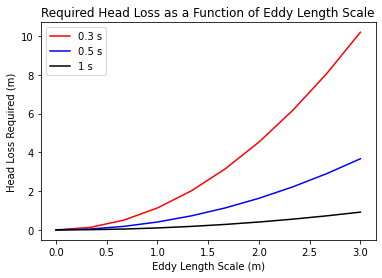

In [78]:
#graphing energy dissipation rate (edr) as a function of eddy length scale
eddy_length_scale = (np.linspace(0, 3, 10))*(u.m)
def head_loss_req(eddy_length_scale, t_eddy):
  return (((eddy_length_scale/t_eddy)**2)/u.gravity).to(u.m)

#plot of average energy dissipation rate as a function of eddy length scale
fig, ax = plt.subplots()
plt.plot(eddy_length_scale, head_loss_req(eddy_length_scale, 0.3*u.s), 'r-')
plt.plot(eddy_length_scale, head_loss_req(eddy_length_scale, 0.5*u.s), 'b-')
plt.plot(eddy_length_scale, head_loss_req(eddy_length_scale, 1*u.s), 'k-')
plt.xlabel('Eddy Length Scale (m)')
plt.ylabel('Head Loss Required (m)')
plt.legend(['0.3 s','0.5 s','1 s'])
plt.savefig('Energy loss as a function of eddy length scale')
plt.title('Required Head Loss as a Function of Eddy Length Scale')
plt.show()



##**Hydraulic Jump**

Below are some preliminary calculations estimating the power dissipation in a hydraulic jump (given maximum flow).  The influent Froude number was chosen on 4.5 based on a [Portland State University study](https://www.scribd.com/document/133785147/Hydraulic-Jump_) citing this as number the lowest Froude number supporting fully developed hydraulic jump.  V2 (velocity after the jump) was chosen arbitrarily.  The number "1" refers to flow before the jump and "2" refers to flow after the jump. More modeling is required to determine the headloss incurred by the hydraulic jump, the number of channels which should be present in the design, and the degree of mixing which is attained. 

Equations used are from [LMNO Engineering](https://www.lmnoeng.com/Channels/HydraulicJump.php)




In [79]:
#MINIMUM HEAD REQUIRED USING SPECIFIED DESIGN PARAMETERS

def min_head_req_hydraulic_jump(F1, flow_rate, channel_width, treatment_trains, V2):
  """Calculates the minimum head required to support a rapid mix hydraulic jump
  subject to the following conditions:
    ----------------------------
    - F1: float
        - Minimum Froude number required in order to sustain a hydraulic jump
    - flow_rate: float (units of volume per time)
        - The maximum flow rate that is expected through the plant (fmt.q_max)
    - channel_width: float
        - The width of an individual hydraulic jump (constrained by available 
          plan view area) 
    - treatment_trains: int
        - Number of treatment trains deemed necessary for flocculation.  There will
          be one rapid mix hydraulic jump per flocculation channel
    - V2: float (units of length per time)
        - The maximum exit velocity from hydraulic jump as determined by hydraulics
          team
    -----------------------------
    Note: plan_view_area_hydraulic_jump does not account for any additional 
    length that may be required before or after the jump.  It also does not account
    for any additional width that may be required during construction. Any variable 
    name with a number 1 before it refers to before the hydraulic jump while a 
    2 refers to it being after the hydraulic jump
  """
  #calculate flow through each jump given flow rate and number of trains
  max_flow_per_unit = flow_rate/treatment_trains
  #calculate ratio of height before and after jump (Y1 and Y2) with F1
  height_ratio = 0.5 * (((1+8*(F1**2))**0.5) - 1)
  V1 = V2 * height_ratio
  Y1 = max_flow_per_unit/(channel_width*V1)
  F2 = V2/(u.gravity*(height_ratio*Y1))**0.5
  #calculate length of the hydraulic jump
  L = 220 * Y1 * np.arctanh((F1-1)/22)
  Y2 = height_ratio * Y1
  #calculate angle of the jump for calculating head
  theta = np.arctan((Y2-Y1)/L)
  #calculate minimum required head to maintain hydraulic jump
  Et1 = Y1*np.cos(theta) + (V1**2)/(2*u.gravity)
  Et2 = Y2*np.cos(theta) + (V2**2)/(2*u.gravity)
  energy_difference = (Et2 - Et1).to(u.m)
  plan_view_area_hydraulic_jump = ((L*channel_width)*treatment_trains).to(u.m**2)
  print('the minimum required headloss given design parameters is', energy_difference)
  print('the minimum total plan view area required is', plan_view_area_hydraulic_jump)
  return energy_difference, plan_view_area_hydraulic_jump

F1 = 4.5
flow_rate = fmt.q_max
channel_width = 5 * (u.m)
treatment_trains = 8
V2 = 0.3 * (u.m/u.s)

min_head_req_hydraulic_jump(F1, flow_rate, channel_width, treatment_trains, V2)


the minimum required headloss given design parameters is 1.243 meter
the minimum total plan view area required is 407.7 meter ** 2


(<Quantity(1.2426774485278158, 'meter')>,
 <Quantity(407.7442620419458, 'meter ** 2')>)

# **Hydraulic Flocculator**

[/Monroe/]: # (Good work exploring hydraulic jump. As you gain more experience you will use the early exploration to very quickly check feasibility so you know whether or not to continue exploring that option. For the hydraulic jump the question is whether their is enough energy available to power a hydraulic jump. Your first design suggests you might have a real problem! But that is great. Check to see if you made any bad assumptions about water depths and if this is the minimum amount of energy that is needed by a hydrualic jump, then you document that including equations in Latex and then move on to a more energy efficiency design. In this case you need to use less energy and thus the maximum velocity in the constricted flow must be MUCH lower.) 

[/Monroe/]: # (When you respond to my comments make the change in the report instead of only addressing it in another comment.)

[/Monroe/]: # (Before writing code show the equations in Latex in Markdown and explain what you are solving for. Showing the equations that you are using is easy and so helpful. I've inserted one equation from the AguaClara textbook below to show how easy it is. NO need to type ANY Latex!)



[/Monroe/]: # (Push forward quickly on the flocculator design. Consider creating functions for the flocculator design so that you can easily create graphs showing a range of designs. For example the number of treatment trains could be a variable that you might explore.)


###**Background**

Flocculation is widely used in water treatment because of the use of sedimentation to remove particles from the water. Flocculation aims to increase the diameter of the particles through applying coagulant during rapid mix.Hydraulic flocculators use a series of baffles in order to generate mixing. In hydraulic flocculation, in order to facilitate particle collisions, we must design a flocculator that takes into account collision potential and energy dissipation rate.

Based on the AguaClara hydraulic flocculation model, we use the physics of the interactions between particles, dissolved organic molecules, and coagulant nanoparticles that flow through the system. In our design, we use a horizontal flow hydraulic flocculator. Critical design criteria and equations used are listed below.

###**Critical Design Criteria**



### *Input Parameters*
Our input parameters for our hydraulic flocculator design are:
$Q$ - flow rate

$T$ - temperature

$G_{\theta}$ - design collision potential rate

$H_{L}$ - head loss

$H_{channel}$ - height of channel

$H_{influent}$ - influent height

$n_{treatment\,trains}$ - number of treatment trains

$n_{redundant}$ - number of redundant treatment trains

### *Output Parameters*
Output parameters we will calculate are:

$\bar G$ - average velocity gradient

$ \theta $ - retention time

$ Q_{TOT}$ - total flow rate

$Q_{treatment\,train}$ - treatment train flow rate

$V_{TOT}$ - total volume

$V_{treatment\,train}$ - treatment train volume

$A_{side\,view}$ - side view area

$A_{plan\,view\,area}$ - plan view area of the flocculator

$A_{treatment\,train}$ - treatment train area

$L_{channel}$ - length of the channel

$W_{channel}$ - width of the channel

$W_{baffle}$ - width of each baffle

$S_{baffles}$ - spacing between the baffles

$H_{effluent}$ - effluent height

$V_{scour}$ - scour velocity


###*Temperature and Flow Rate Variation Analysis*

We will do two analyses on variation in temperature and flow rate. Temperature is used to calculate the viscosity, which is important for the velocity gradient. We can use the stream gauge data to get the water temperature and averages for a certain number of years. We will run three different water temperatures for the flocculator, a minimum, maximum, and average. We will analyze the variation in number of treatment trains.
For our analysis on flow rate, we will look at three different flow rates - a minimum, maximum, and average. We will analyze the variation in number of treatment trains based on flow rate variation.
Being that our flocculator is designed with a given headloss, the effluent height and so the entrance height for the sedimentation tanks is purely a function of the influent height, which is in turn a function of flow rate and headloss through the rapid mix.

### **Design Equations for Hydraulic Flocculator Design**

Equations 1-3 from AguaClara textbook [eqns 383-385](https://aguaclara.github.io/Textbook/Flocculation/Floc_Design.html#equation-flocculation-floc-design-15).


**1. For average velocity gradient $\bar G$:**
$$ \bar G^2 = \frac{g h_{L_{floc}}}{\nu G_{t}} $$

**2. Hydraulic retention time:**
$$ \theta = \frac{G_{t}}{\bar G} $$

**3. Total design volume of flocculator:**
$$ V_{design\,tot} = Q * \theta $$

**4. Volume of each treatment train in flocculator:**
$\textit{without redundancy}$
$$ V_{treatment\,train} = \frac{V_{tot}}{n_{treatment\,trains}}$$


**5. Total volume of floccutor:**
$$ V_{tot} = \frac{V_{treatment\,trains}}{n_{treatment\,trains}} $$

**6. Total flow rate through flocculator:**
$$ Q_{tot} = \frac{Q_{treatment\,train}}{n_{treatment\,trains}} $$

**7. Width of channel with predesigned height:**

Based on [equation](https://aguaclara.github.io/Textbook/Flocculation/Floc_Design.html#equation-flocculation-floc-design-25) for the design of the flocculator.
$$H_{e_{Max}} = \left[ \frac{K}{2 \nu G_{CS}^2} \left( \frac{Q \Pi_{{HS}_{Max}}}{W_{channel}} \right)^3 \right]^\frac{1}{4}$$

Reaarranged:

$$W_{channel} = \left[ \frac{K}{2 \nu \bar G^2} \left( \frac{Q \Pi_{{HS}_{Max}}}{H_{channel}} \right)^3 \right]^\frac{1}{4}$$

**8. Spacing between baffles:**
$$ S_{baffles}=\frac{W_{channel}}{\Pi_{{HS}_{Max}}}$$

**9. Length of channel:**
with predesigned height and calculated width
$$ L_{channel}=\frac{V_{treatment\,train}}{W_{channel}\,H_{channel}}$$

**10. Side view area of flocculator:**
$$ A_{side\,view} = \frac{V_{treatment\,train}}{W_{channel}}$$

**11. Plan view area of each treatment train:**
$$ A_{plan\,view}=\frac{V_{treatment\,train}}{H_{channel}}$$

**12. Total plan view area:**
$$ A_{tot}=W_{channel} L_{channel} n_{treatment\,trains} $$

**13. Number of baffles in each treatment train:**
$$ n_{baffles} = \frac{L_{channel}}{S_{baffles}}$$

**14. Scour velocity:**
$$ V_{scour} = \frac{Q_{treatment\,train}}{H_{channel}\,S_{baffles}}$$

**15. Effluent height of water:**
$$ H_{effluent}= H_{influent} - H_{L} $$

##**Results**

[/Monroe/]: # (Comment on the results of your design calculaions. Check whether or not the design is reasonable. Reasonable is defined by constraints of the project and goals of reducing cost and resource use.)

[/Yitzy/]: # (include info on the output excel)

In [0]:
from google.colab import files

In [0]:
#HydraulicFlocculator Code
class HydraulicFlocculator:
    """Calculates physical dimensions of a Hydraulic Flocculator
    ----------------------------
    - BAFFLE_K (K or K_{baffle}): float
        - The minor loss coefficient of the flocculator baffles.
    - RATIO_MAX_WS (\Pi_{WS}): float
        - The maximum ratio between expansion width and baffle spacing
    """

    BAFFLE_K = 4
    RATIO_MAX_WS = 3

    def __init__(
            self,
            Q=1 * u.L/u.s,
            temp=25 * u.degC,
            Gt=37000,
            headloss = 0.4 * u.m,
            channel_H = 4 * u.m,
            influent_H = 4 * u.m,
            n_treatment_trains = 1,
            n_redundancy = 1):

        self.Q = Q
        self.temp = temp
        self.Gt = Gt
        self.headloss = headloss
        self.channel_H = channel_H
        self.influent_H = influent_H
        self.n_treatment_trains = n_treatment_trains
        self.n_redundancy = n_redundancy

    @property
    def vel_grad_avg(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculate the average velocity gradient (G-bar) of water flowing
        through the flocculator.
        :returns: Average velocity gradient (G-bar)
        :rtype: float * 1 / second
        """
        return ((u.standard_gravity * self.headloss) /
               (ac.viscosity_kinematic_water(self.temp) * self.Gt)).to(u.s ** -1)

    @property
    def retention_time(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculates the hydraulic retention time neglecting the volume created by head loss in the flocculator.
        :returns: Hydraulic retention time (:math:`\theta`)
        :rtype: float * second
        """
        return (self.Gt / self.vel_grad_avg).to(u.s)

    @property
    def design_total_vol(self):
        #NOTE: this is borrowed from AguaClara source code
        """Calculates the total volume of the flocculator.
        :returns: Total volume
        :rtype: float * meter ** 3
        """
        return (self.Q * self.retention_time).to(u.m ** 3)

    @property
    def treatment_train_vol(self):
        """Calculates the volume of each treatment train in the flocculator.
        :returns: Volume of each treatment train
        :rtype: float * meter ** 3
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.design_total_vol/(self.n_treatment_trains)).to(u.m ** 3)
        else:
          return (self.design_total_vol/(self.n_treatment_trains-self.n_redundancy)).to(u.m ** 3)

    @property
    def treatment_train_flow(self):
        """Calculates the flowrate through each treatment train in the flocculator.
        :returns: Flowrate through each treatment train
        :rtype: float * liter / second
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.Q/(self.n_treatment_trains)).to(u.L/u.s)
        else:
          return (self.Q/(self.n_treatment_trains-self.n_redundancy)).to(u.L/u.s)

    @property
    def total_vol(self):
        """Calculates the total volume of the flocculator.
        :returns: Total volume of the flocculator
        :rtype: float * meter ** 3
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.treatment_train_vol*self.n_treatment_trains).to(u.m ** 3)
        else:
          return (self.treatment_train_vol*self.n_treatment_trains).to(u.m ** 3)

    @property
    def total_flow(self):
        """Calculates the total flowrate through the flocculator.
        :returns: Total flowrate through the flocculator
        :rtype: float * liter / second
        """
        if (self.n_treatment_trains - self.n_redundancy) <= 1:
          return (self.treatment_train_flow*self.n_treatment_trains).to(u.L/u.s)
        else:
          return (self.treatment_train_flow*self.n_treatment_trains).to(u.L/u.s)

    @property
    def channel_W(self):
        #NOTE: This is borrowed from AguaClara source code
        """Calculates the width of the channel with a predesigned height.
        :returns: Width of the channel
        :rtype: float * meter
        """
        return (((self.RATIO_MAX_WS**3*self.treatment_train_flow**3*self.BAFFLE_K)/
                (self.channel_H**3*2*ac.viscosity_kinematic_water(self.temp)*self.vel_grad_avg**2))**(1/4)).to(u.m)

    @property
    def baffle_S(self):
        #NOTE: This is borrowed from AguaClara source code
        """Calculates the spacing between baffles.
        :returns: Spacing between baffles
        :rtype: float * meter
        """
        return (self.channel_W/self.RATIO_MAX_WS).to(u.m)

    @property
    def baffle_W(self):
        """Calculates the width of the channel with a predesigned height.
        :returns: Width of the channel
        :rtype: float * meter
        """
        return (self.channel_W-self.baffle_S).to(u.m)

    @property
    def channel_L(self):
        """Calculates the length of the channel with a predesigned height and a calculated width.
        :returns: Length of the channel
        :rtype: float * meter
        """
        return (self.treatment_train_vol/(self.channel_W*self.channel_H)).to(u.m)
        
    @property
    def side_view_area(self):
        """Calculates the side view area of the flocculator.
        :returns: Side view area
        :rtype: float * meter ** 2
        """
        return (self.treatment_train_vol/self.channel_W).to(u.m**2)
    
    @property
    def treatment_train_plan_view_area(self):
        """Calculates the plan view area of each treatment train.
        :returns: Plan view are of treatment train
        :rtype: float * meter ** 2
        """
        return (self.treatment_train_vol/self.channel_H).to(u.m**2)

    @property
    def total_plan_view_area(self):
        """Calculates the plan view area of the flocculator
        :returns: Plan view are of flocculator
        :rtype: float * meter ** 2
        """
        return (self.channel_W*self.channel_L*self.n_treatment_trains).to(u.m**2)

    @property
    def baffle_n(self):
        """Calculates the number of the baffles in each treatment train.
        :returns: Number of baffles in treatment train
        :rtype: float * dimensionless
        """
        return (np.ceil((self.channel_L/self.baffle_S))).to(u.dimensionless)

    @property
    def vel_scour(self):
        """Calculates the velocity in the flocculator.
        :returns: Velocity in flocculator
        :rtype: float * meter / second
        """
        return (self.treatment_train_flow/(self.channel_H*self.baffle_S)).to(u.m/u.s)

    @property
    def effluent_H(self):
        """Calculates the effluent height of the water.
        :returns: Height of effluent water
        :rtype: float * meter
        """
        return (self.influent_H-self.headloss).to(u.m)

    @property
    def design(self):
        """Returns the designed values.
        :returns: list of designed values
        :rtype: dictionary
        """
        floc_dict = {'G': self.vel_grad_avg,
                     't': self.retention_time,
                     'total_flow': self.total_flow,
                     'treatment_train_flow': self.treatment_train_flow,
                     'total_vol': self.total_vol,
                     'treatment_train_vol': self.treatment_train_vol,
                     'side_view_area': self.side_view_area,
                     'total_plan_view_area': self.total_plan_view_area,
                     'treatment_train_plan_view_area': self.treatment_train_plan_view_area,
                     'channel_L': self.channel_L,
                     'channel_W': self.channel_W,
                     'baffle_S': self.baffle_S,
                     'baffle_W': self.baffle_W,
                     'baffle_n': self.baffle_n,
                     'effluent_H': self.effluent_H,
                     'vel_scour': self.vel_scour}
                     
        return floc_dict

#Analysis Intention

The intention of the analysis was twofold: First, analyze our calculations for the fairmont treatment plant. Second, create an analysis system that is easy to adapt for any of the desired input parameters.

As a conseequence of these goals we decided that instead of using python code to do the comparison with graphs and figures, we'd output a data frame to excel which is more universally workable. Comparison can then be taken by whomever downloads the excel.

#Fairmont Analysis

We varied three parameters; flowrate, temperature, and the number of treatment trains. 

Below are two sample outputs from our design briefly demonstrated in onshape. There are a few errors with the outputs but thats the fault of my poor onshape skill not that of the code. 

These pictures are purely for demonstration only.

![alt text](https://github.com/yyr2/pics4520/blob/master/Annotation%202020-05-16%20213013.png?raw=true)

![alt text](https://github.com/yyr2/pics4520/blob/master/Annotation%202020-05-16%20215831.png?raw=true)

The following parameters were the inputs for the above drawing.

* flowrate = 720 cfs
* temperature = 24.4 C
* G theta = 37000 
* headloss through flocculator = 0.4 m
* channel height = 4 m
* number of treatment trains = 9
* number of redudant treatment trains = 2

In the above onShape drawings we can clearly see that the amount of space required to house the whole flocculator is very resonable as is the induced head. 

It is highley recommended that a hydraulic flocculator be considered and evaluated against alternatives.

Note: The velocity necessary to prevent unwanted sedimentation of formed flocs is higher than the standard 0.5 ft/s in all flow rates designed.

#Future Work

Our code outputs a design. It is essential that once a design is outputed its performance be evaluated across varying flowrates and temperatures.

Its wrongly assumed that the baffles and suporting chanel walls have no width.

When dividing the flow rate among to different channels our code can't work around when redundancy is equal to the number of treament trains.

Won't provide errors if velocity is below "scour velocity".

Won't provide errors for wrong inputs, only multipliction errors.

We've include precoded "for loops" for varying various inputs for the excel. Use on creating and appending dataframes is necessary for building the right size excel. Perhaps creating a function that just requires the input ranges and the outputs an n*m data frame that the user can then manipulate to get the relevant information may be useful.


In [82]:
# Analysis for Fairmont

input_Q = fmt.q_max
input_temp = 15
input_Gt = 37000
input_headloss = 0.4
input_channel_H = 4
input_n_treatment_trains = 8
input_n_redudency = 1

row_names =  ['Design Temperature',
              'Design Flowrate',
              'Flowrate per Treatment Train',
              'Total Flowrate',
              'Scour Velocity', 
              'Total Volume',
              'Volume per Treatment Train',
              'Total Plan View Area',
              'Side View Area', 
              'Treatment Train Plan View Area',
              'Flocculator Influent Water Height',
              'Flocculator Effluent Water Height',
              'Channel Length', 
              'Channel Width', 
              'Channel Height', 
              'Baffle Spacing', 
              'Baffle Width', 
              'Number of Baffles',
              'Number of Redundant Treatment Trains',
              '']

totaldf=pd.DataFrame()
df=pd.DataFrame()
HF_data = HydraulicFlocculator( Q = input_Q.to(u.L/u.s),
                                temp = input_temp*u.degC,
                                Gt = input_Gt*u.dimensionless,
                                headloss = input_headloss*u.m,
                                channel_H = input_channel_H*u.m,
                                n_treatment_trains = input_n_treatment_trains,
                                n_redundancy = input_n_redudency*u.dimensionless)
  
data = [HF_data.temp.magnitude,
        HF_data.Q.magnitude,
        HF_data.treatment_train_flow.magnitude,
        HF_data.total_flow.magnitude,
        HF_data.vel_scour.magnitude,
        HF_data.total_vol.magnitude,
        HF_data.treatment_train_vol.magnitude,
        HF_data.total_plan_view_area.magnitude,
        HF_data.side_view_area.magnitude,
        HF_data.treatment_train_plan_view_area.magnitude,
        HF_data.influent_H.magnitude,
        HF_data.effluent_H.magnitude,
        HF_data.channel_L.magnitude,
        HF_data.channel_W.magnitude,
        HF_data.channel_H.magnitude,
        HF_data.baffle_S.magnitude,
        HF_data.baffle_W.magnitude,
        HF_data.baffle_n.magnitude,
        HF_data.n_redundancy.magnitude,
        '']
df[str(input_n_treatment_trains)+' Treatment Trains'] = pd.Series(data,index=row_names)

row_units =  [HF_data.temp.units,
              HF_data.Q.units,
              HF_data.treatment_train_flow.units,
              HF_data.total_flow.units,
              HF_data.vel_scour.units,
              HF_data.total_vol.units,
              HF_data.treatment_train_vol.units,
              HF_data.total_plan_view_area.units,
              HF_data.side_view_area.units,
              HF_data.treatment_train_plan_view_area.units,
              HF_data.influent_H.units,
              HF_data.effluent_H.units,
              HF_data.channel_L.units,
              HF_data.channel_W.units,
              HF_data.channel_H.units,
              HF_data.baffle_S.units,
              HF_data.baffle_W.units,
              HF_data.baffle_n.units,
              HF_data.n_redundancy.units,
              '']

df['Units'] = pd.Series(row_units,index=row_names)
totaldf = totaldf.append(df)

print(totaldf)

print('At lowest flow rate in design for highest flowrate we have the following:\n')

t_t_flow = fmt.q_min/input_n_treatment_trains
print('Flow per treatment train =', t_t_flow.to(u.L/u.s))

res_t = (HF_data.treatment_train_vol/t_t_flow).to(u.min)
print('Residence time =',res_t)

G_bar = np.sqrt(u.standard_gravity*(input_headloss*u.m)/(ac.viscosity_kinematic_water(input_temp*u.degC)*res_t)).to(1/u.min)
print('G Bar = ',G_bar)

G_theta = (res_t*G_bar).to(u.dimensionless)
print('G Theta =',G_theta)

vel_s = t_t_flow/(HF_data.channel_H*HF_data.baffle_S)
print('Velocity per treatment train =',vel_s.to(u.m/u.s))

                                     8 Treatment Trains           Units
Design Temperature                                   15            degC
Design Flowrate                               2.039e+04  liter / second
Flowrate per Treatment Train                      2,913  liter / second
Total Flowrate                                 2.33e+04  liter / second
Scour Velocity                                   0.3223  meter / second
Total Volume                                      9,246      meter ** 3
Volume per Treatment Train                        1,156      meter ** 3
Total Plan View Area                              2,312      meter ** 2
Side View Area                                    170.6      meter ** 2
Treatment Train Plan View Area                    288.9      meter ** 2
Flocculator Influent Water Height                     4           meter
Flocculator Effluent Water Height                   3.6           meter
Channel Length                                    42.64         

In [83]:
# Designs for Fairmont with variying flowrates, temperatures, and treatment train numbers.

input_Q = [fmt.q_min,fmt.q_ave,fmt.q_max] #[min avg max] #Scope of work
input_temp = [15, 31.3] #[min avg max] #USGS streamflow avged over 60 years 
input_Gt = 37000
input_headloss = 0.4
input_channel_H = 4
input_n_treatment_trains = 10
input_n_redudency = 1

row_names =  ['Design Temperature',
              'Design Flowrate',
              'Flowrate per Treatment Train',
              'Total Flowrate',
              'Scour Velocity', 
              'Total Volume',
              'Volume per Treatment Train',
              'Total Plan View Area',
              'Side View Area', 
              'Treatment Train Plan View Area',
              'Flocculator Influent Water Height',
              'Flocculator Effluent Water Height',
              'Channel Length', 
              'Channel Width', 
              'Channel Height', 
              'Baffle Spacing', 
              'Baffle Width', 
              'Number of Baffles',
              'Number of Redundant Treatment Trains',
              '']

totaldf=pd.DataFrame()
df=pd.DataFrame()
for q in range(1,len(input_Q)+1):
  for t in range(1,len(input_temp)+1):  
    for ntt in range(1,input_n_treatment_trains+1):
      HF_data = HydraulicFlocculator( Q = input_Q[q-1].to(u.L/u.s),
                                      temp = input_temp[t-1]*u.degC,
                                      Gt = input_Gt*u.dimensionless,
                                      headloss = input_headloss*u.m,
                                      channel_H = input_channel_H*u.m,
                                      n_treatment_trains = ntt,
                                      n_redundancy = input_n_redudency*u.dimensionless)
        
      data = [HF_data.temp.magnitude,
              HF_data.Q.magnitude,
              HF_data.treatment_train_flow.magnitude,
              HF_data.total_flow.magnitude,
              HF_data.vel_scour.magnitude,
              HF_data.total_vol.magnitude,
              HF_data.treatment_train_vol.magnitude,
              HF_data.total_plan_view_area.magnitude,
              HF_data.side_view_area.magnitude,
              HF_data.treatment_train_plan_view_area.magnitude,
              HF_data.influent_H.magnitude,
              HF_data.effluent_H.magnitude,
              HF_data.channel_L.magnitude,
              HF_data.channel_W.magnitude,
              HF_data.channel_H.magnitude,
              HF_data.baffle_S.magnitude,
              HF_data.baffle_W.magnitude,
              HF_data.baffle_n.magnitude,
              HF_data.n_redundancy.magnitude,
              '']
      df[str(ntt)+' Treatment Trains'] = pd.Series(data,index=row_names)

    row_units =  [HF_data.temp.units,
                  HF_data.Q.units,
                  HF_data.treatment_train_flow.units,
                  HF_data.total_flow.units,
                  HF_data.vel_scour.units,
                  HF_data.total_vol.units,
                  HF_data.treatment_train_vol.units,
                  HF_data.total_plan_view_area.units,
                  HF_data.side_view_area.units,
                  HF_data.treatment_train_plan_view_area.units,
                  HF_data.influent_H.units,
                  HF_data.effluent_H.units,
                  HF_data.channel_L.units,
                  HF_data.channel_W.units,
                  HF_data.channel_H.units,
                  HF_data.baffle_S.units,
                  HF_data.baffle_W.units,
                  HF_data.baffle_n.units,
                  HF_data.n_redundancy.units,
                  '']

    df['Units'] = pd.Series(row_units,index=row_names)
    totaldf = totaldf.append(df)

print(totaldf)

totaldf.to_excel('HydraulicFlocculator.xlsx') 
files.download('HydraulicFlocculator.xlsx')

                                     1 Treatment Trains  ...           Units
Design Temperature                                   15  ...            degC
Design Flowrate                                   2,629  ...  liter / second
Flowrate per Treatment Train                      2,629  ...  liter / second
Total Flowrate                                    2,629  ...  liter / second
Scour Velocity                                   0.3142  ...  meter / second
...                                                 ...  ...             ...
Baffle Spacing                                    8.845  ...           meter
Baffle Width                                      17.69  ...           meter
Number of Baffles                                     6  ...   dimensionless
Number of Redundant Treatment Trains                  1  ...   dimensionless
                                                         ...                

[120 rows x 11 columns]


In [0]:
#Precoded 'for loops' for varying inputs

input_Q = []
input_temp = [] 
input_Gt = []
input_headloss = []
input_channel_H = []
input_n_treatment_trains = 8
input_n_redudency = 2

for q in range(1,len(input_Q)+1):
  for t in range(1,len(input_temp)+1):
    for g in range(1,len(input_Gt)+1):
      for h in range(1,len(input_headloss)+1):
        for ch in range(1,len(input_channel_H)+1):
          for ntt in range(1,input_n_treatment_trains+1):
            for nr in range(1,input_n_redudency+1):
              HF_data = HydraulicFlocculator( Q = input_Q[q-1].to(u.L/u.s),
                                temp = input_temp[t-1]*u.degC,
                                Gt = input_Gt[g-1]*u.dimensionless,
                                headloss = input_headloss[h-1]*u.m,
                                channel_H = input_channel_H[ch-1]*u.m,
                                n_treatment_trains = ntt,
                                n_redundancy = nr*u.dimensionless)